In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
colName=['sepal_length','sepal_width','petal_length','petal_width','class']
irisDataset=pd.read_csv("irisD.data",names=colName)

In [3]:
irisDataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
irisDataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
X=irisDataset.iloc[:,:-1].values 
Y=irisDataset.iloc[:,4].values 

In [6]:
labelEncoder=LabelEncoder()
Y=labelEncoder.fit_transform(Y)

In [7]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# shuffling the dataset
X,Y=shuffle(X,Y,random_state=20)
Y

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1,
       1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2,
       0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1,
       1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1])

In [9]:
foldModel=model_selection.KFold(n_splits=5,random_state=None)

In [10]:
# trainset and testset
for i,j in foldModel.split(X,Y):
    train_x,test_x=X[i],X[j]
    train_y,test_y=Y[i],Y[j]
    print("-"*20+"Train Set"+"-"*20)
    print(train_x)
    print("-"*20+"Test Set"+"-"*20)
    print(test_x)

--------------------Train Set--------------------
[[5.7 3.  4.2 1.2]
 [5.6 3.  4.1 1.3]
 [5.1 3.5 1.4 0.2]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [4.9 2.5 4.5 1.7]
 [6.  3.4 4.5 1.6]
 [4.9 3.  1.4 0.2]
 [6.4 3.2 4.5 1.5]
 [7.4 2.8 6.1 1.9]
 [5.7 2.8 4.5 1.3]
 [6.1 2.6 5.6 1.4]
 [4.9 3.6 1.4 0.1]
 [6.7 3.1 4.4 1.4]
 [6.3 3.3 4.7 1.6]
 [4.7 3.2 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.  3.3 1.4 0.2]
 [5.7 2.5 5.  2. ]
 [5.1 3.8 1.9 0.4]
 [6.4 2.8 5.6 2.2]
 [6.2 3.4 5.4 2.3]
 [5.4 3.4 1.5 0.4]
 [6.3 3.3 6.  2.5]
 [6.  2.2 4.  1. ]
 [5.6 2.9 3.6 1.3]
 [5.6 3.  4.5 1.5]
 [4.5 2.3 1.3 0.3]
 [5.1 3.4 1.5 0.2]
 [5.5 2.4 3.8 1.1]
 [6.2 2.9 4.3 1.3]
 [5.8 2.6 4.  1.2]
 [5.6 2.5 3.9 1.1]
 [6.7 3.1 4.7 1.5]
 [6.5 2.8 4.6 1.5]
 [5.7 2.9 4.2 1.3]
 [5.1 3.3 1.7 0.5]
 [6.2 2.2 4.5 1.5]
 [6.3 2.3 4.4 1.3]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.4 3.  4.5 1.5]
 [5.5 2.3 4.  1.3]
 [6.1 3.  4.6 1.4]
 [5.1 3.8 1.5 0.3]
 [5.3 3.7 1.5 0.2]
 [6.4 3.2 5.3 2.3]
 [5.5 3.5 1.3 0.2]
 [4.8 3.1 1.6 0.2]
 [5.  2.  3.5 1. ]


In [11]:
decisionTreeAccuracy=[]
#Decision tree classifier
for i,j in foldModel.split(X,Y):
    trainingX,testingX=X[i],X[j]
    trainingY,testingY=Y[i],Y[j]
    
    clfDTree=DecisionTreeClassifier()
    clfDTree.fit(trainingX,trainingY)
    predY=clfDTree.predict(testingX)
    decisionTreeAccuracy.append(accuracy_score(predY,testingY))
print(decisionTreeAccuracy)
# saving model to run later
joblib.dump(clfDTree,"DecisionTreeClassifierModel.joblib")

[0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333]


['DecisionTreeClassifierModel.joblib']

## Question

Evaluate how K impacts the overall accuracy of kNN on the dataset. Use histogram plots to visualize the results and identify the best K.

-----------------------------------------------------------------------------------------------------------------

In [12]:
# Knn Classifier
maxKvalue=25
KNNAccuracy=[[] for i in range(maxKvalue)]
meankNNaccuracy = []

for i,j in foldModel.split(X,Y):
    trainingKX,testingKX=X[i],X[j]
    trainingKY,testingKY=Y[i],Y[j]

    for k in range(0,maxKvalue):
        clfknn=KNeighborsClassifier(n_neighbors=k+1)
        clfknn.fit(trainingKX,trainingKY)
        predKY=clfknn.predict(testingKX)
        KNNAccuracy[k].append(accuracy_score(predKY,testingKY))
# calculating mean accuarcy for each k value
for i in range(0,maxKvalue):
    meankNNaccuracy.append(np.mean(KNNAccuracy[i]))

print("Mean accuracy for each value of K")
print(meankNNaccuracy)
# saving model to run later
joblib.dump(clfknn,"KNNClassifierModel.joblib")

Mean accuracy for each value of K
[0.96, 0.9400000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333333, 0.9800000000000001, 0.9800000000000001, 0.9666666666666666, 0.9666666666666668, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.96, 0.96, 0.9466666666666667, 0.96]


['KNNClassifierModel.joblib']

In [13]:
# best value of K
bestKvalue=meankNNaccuracy.index(max(meankNNaccuracy))+1
print("Best value of K for better accuracy=",bestKvalue)

Best value of K for better accuracy= 6


-----------------------------------------------------------------------------------------------------------------

## Ans : - Best value for k is 6

-----------------------------------------------------------------------------------------------------------------

## Ans: - KNN Accuracy Histogram

Text(0.5, 1.0, 'KNN Accuracy')

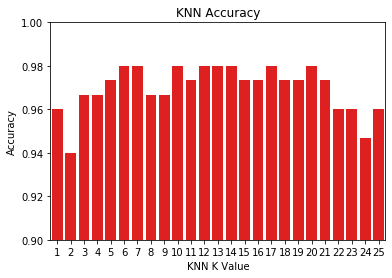

In [14]:
knnAccuracy = {
    'KNN K Value': [y+1 for y in range(maxKvalue)], 
    'Accuracy': meankNNaccuracy
}
df=pd.DataFrame(knnAccuracy)
graph = sns.barplot(x="KNN K Value",y="Accuracy",data=df,color="red")
graph.set_ylim([.9,1])
graph.set_title("KNN Accuracy")

-----------------------------------------------------------------------------------------------------------------

## Question

Compare the overall accuraciesof kNN with the best K and decision trees using histogram plots. Which classifier is better and why?

-----------------------------------------------------------------------------------------------------------------

Text(0.5, 1, 'KNN Classifier Accuracy Vs Decision Tree Classifier Accuracy')

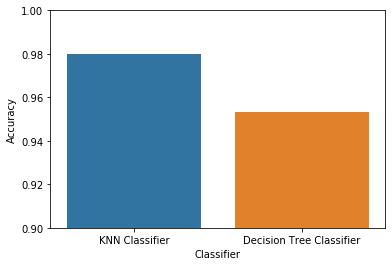

In [15]:
# comparing the average accuracy of KNN and Decision Tree
graphModel = {
    'Classifier': ('KNN Classifier', 'Decision Tree Classifier'), 
    'Accuracy': [meankNNaccuracy[bestKvalue], np.mean(decisionTreeAccuracy)]
}
df = pd.DataFrame(graphModel)
x = sns.barplot(x="Classifier",y="Accuracy",data=df)
x.set_ylim([.9,1])
graph.set_title("KNN Classifier Accuracy Vs Decision Tree Classifier Accuracy" ,loc="center")

In [16]:
print("KNN Accuracy=",meankNNaccuracy[bestKvalue]*100)
print("Decision Tree Accuracy=",np.mean(decisionTreeAccuracy)*100)

KNN Accuracy= 98.00000000000001
Decision Tree Accuracy= 95.33333333333334


Ans: - 
From above observation, we can see KNN performs better than decision tree. 
## KNN Accuracy= 98.00000000000001
## Decision Tree Accuracy= 95.33333333333334
KNN is a lazy learning classifier. Lazy learning, which means that there is no explicit training phase before classification. Instead, any attempts to generalize or abstract the data is made upon classification. KNN classifications can be computationally expensive as the algorithm parse through all data points for each classification.  For this reason, KNN tends to work best on smaller datasets that do not have many features. 

On the other hand, Decision tree is an Eager learning classifier. Decision tree needs a bigger dataset to predict values with better accuracy. With a bigger dataset, we need to take care of overfitting because it affects the efficiency of the Decision tree. 

Thats why KNN performs better than Decision Tree.


-----------------------------------------------------------------------------------------------------------------

## Loading model from system and running 50 random samples from iris dataset.

-----------------------------------------------------------------------------------------------------------------

In [17]:
# getting random 50 samples from dataset to check saved model
df=pd.DataFrame(irisDataset).sample(n=50,random_state=999)
sampleX=df.iloc[:,:-1].values
groundTruth=labelEncoder.fit_transform(df.iloc[:,4].values)
groundTruth

array([1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1,
       2, 1, 0, 1, 0, 0])

In [18]:
dtree=joblib.load("DecisionTreeClassifierModel.joblib")
print(dtree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [19]:
dtree.predict(sampleX)

array([1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1,
       2, 1, 0, 2, 0, 0])

In [20]:
knn=joblib.load("KNNClassifierModel.joblib")
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [21]:
knn.predict(sampleX)

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1,
       2, 1, 0, 2, 0, 0])

link to code--------- https://colab.research.google.com/drive/1h9DrLL3ut8UgVoU4tUWqP3De3EysZb7g